In [7]:
import numpy as np
import pandas as pd

def double_exp_smooth(d, extra_periods=1, alpha = 0.4, beta = 0.4):
    
    # Historical period length
    cols = len(d)
    
    d = np.append(d, [np.nan]*extra_periods)
    
    # Create of the level, trend and forecast arrays
    f, a, b = np.full((3, cols+extra_periods), np.nan)
    
    # Level and trend initialization
    
    a[0] = d[0]
    b[0] = d[1] - d[0]
    
    # Create all the t+1 forecast
    
    for t in range(1, cols):
        f[t] = a[t-1] + b[t-1]
        a[t] = alpha*d[t] + (1-alpha)*(a[t-1] + b[t-1])
        b[t] = beta*(a[t] - a[t-1]) + (1 - beta)*b[t-1]
        
    # Forecast for all extra periods
    
    for t in range(cols, cols+extra_periods):
        f[t] = a[t-1] + b[t-1]
        a[t] = f[t]
        b[t] = b[t-1]
    
    df = pd.DataFrame.from_dict({'Demand':d, 'Forecast':f, 'Level':a, 'Trend':b, 'Error':d-f})
    
    return df

In [8]:
d = [28, 19, 18, 13, 19, 16, 19, 18, 13, 16, 16, 11, 11, 18, 15, 13, 15, 13, 11, 13, 10, 12]
df = double_exp_smooth(d, extra_periods=4)

In [9]:
def kpi(df):
    ''' Calculate BIAS ablolute and scaled
        Calculate MAPE
        MAE absolute and scaled
        RMSE
    '''
    dem_ave = df.loc[df['Error'].notnull(), 'Demand'].mean()
    bias_abs = df['Error'].mean()
    bias_rel = bias_abs / dem_ave
    print('Bias: {:0.2f}, {:.2%}'.format(bias_abs, bias_rel))
    
    MAPE = (df['Error'].abs()/df['Demand']).mean()
    print('MAPE: {:.2%}'.format(MAPE))
    
    MAE_abs = df['Error'].abs().mean()
    MAE_rel = MAE_abs / dem_ave
    print('MAE: {:0.2f}, {:.2%}'.format(MAE_abs, MAE_rel))
    
    RMSE_abs = np.sqrt((df['Error']**2).mean())
    RMSE_rel = RMSE_abs / dem_ave
    print('RMSE: {:0.2f}, {:.2%}'.format(RMSE_abs, RMSE_rel))

In [10]:
kpi(df)

Bias: 2.52, 17.14%
MAPE: 28.29%
MAE: 4.36, 29.60%
RMSE: 6.21, 42.19%


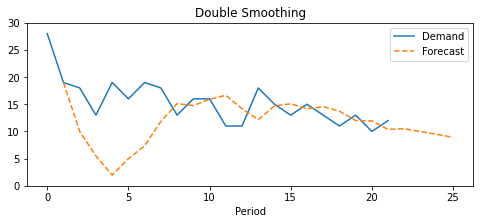

In [11]:
df.index.name='Period'
df[['Demand', 'Forecast']].plot(figsize=(8,3), title = 'Double Smoothing', ylim = (0,30), style = ['-', '--'])

In [13]:
df.head()

,Demand,Forecast,Level,Trend,Error
Period,,,,,
0,28.0,NaN,28.00000,-9.000000,NaN
1,19.0,19.0000,19.00000,-9.000000,0.0000
2,18.0,10.0000,13.20000,-7.720000,8.0000
3,13.0,5.4800,8.48800,-6.516800,7.5200
4,19.0,1.9712,8.78272,-3.792192,17.0288
